In [4]:
import importlib
import importlib
import sys
import os
sys.path.append(os.path.abspath("src"))
import normalizer
from normalizer import Normalizer
import neural_network
importlib.reload(neural_network)
from neural_network import NeuralNetwork
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from regression import *

### Backpropagation

1. **Equation for updating the error for the k-th layer**:
   $$
   e_i^k = f'(z_i^k) \sum_j w_{i,j}^{(k+1)} e_j^{(k+1)}
   $$
   
2. **Error for the last (m-th) layer**:
   $$
   e_j^m = \left( f(z_j^m) - y_j^m \right) f'(z_j^m)
   $$
   where `m` is the last layer (output layer).

3. **Weight update for the k-th layer**:
   $$
   \Delta w_{i,j}^k = -\text{learning\_rate} \cdot f(z_i^{(k-1)}) \cdot e_j^k
   $$
   
4. **Bias update for the k-th layer**:
   $$
   \Delta b_j^k = -\text{learning\_rate} \cdot e_j^k
   $$
   
5. **Index j belongs to [M]**, where M is the input size.


In [310]:
def load_data(training_path, test_path, index_col=0):
    training=pd.read_csv(training_path, index_col=index_col)
    test=pd.read_csv(test_path, index_col=index_col)

    X_train, Y_train=training['x'].to_numpy().reshape(-1,1), training['y'].to_numpy().reshape(-1,1)
    X_test, Y_test=test['x'].to_numpy().reshape(-1,1), test['y'].to_numpy().reshape(-1,1)

    return X_train, Y_train, X_test, Y_test

In [35]:
def plot_fitted_vs_actual(X_train, Y_train, Y_pred, train_or_test):
    plt.figure(figsize=(6, 4))
    plt.scatter(X_train, Y_pred, color='r', label="Predicted values")
    plt.scatter(X_train, Y_train, color='b', label="True values")
    plt.xlabel(f'X_{train_or_test}')
    plt.ylabel(f'Y_{train_or_test}')
    plt.legend()
    plt.grid(True)
    plt.show()

#### Square simple dataset

Text(0, 0.5, 'Y_train')

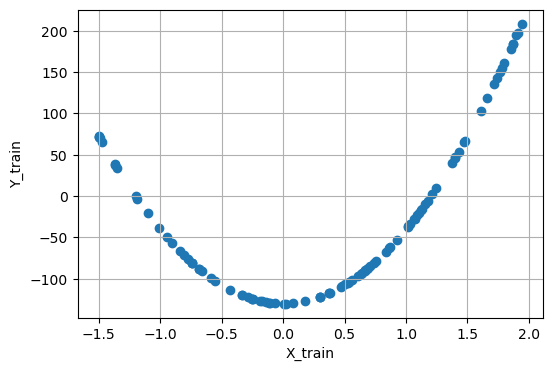

In [14]:
square_simple_training_path='data/square-simple-training.csv'
square_simple_test_path='data/square-simple-test.csv'

X_train_square_simple, Y_train_square_simple, X_test_square_simple, Y_test_square_simple=load_data(square_simple_training_path, square_simple_test_path)

plt.figure(figsize=(6, 4))
plt.grid(True)
plt.scatter(X_train_square_simple, Y_train_square_simple)
plt.xlabel('X_train')
plt.ylabel('Y_train')

In [25]:
normalizer_square_simple = Normalizer()
X_train_square_simple_normalized, Y_train_square_simple_normalized = normalizer_square_simple.fit_transform(X_train_square_simple, Y_train_square_simple)
X_test_square_simple_normalized, Y_test_square_simple_normalized = normalizer_square_simple.transform(X_test_square_simple, Y_test_square_simple)

Epoch 0, Training Loss: 0.156535, Test Loss: 0.141735
Epoch 1000, Training Loss: 0.000156, Test Loss: 0.000176
Epoch 2000, Training Loss: 0.000013, Test Loss: 0.000018
Epoch 3000, Training Loss: 0.000025, Test Loss: 0.000024
Epoch 4000, Training Loss: 0.000011, Test Loss: 0.000015
Epoch 5000, Training Loss: 0.000007, Test Loss: 0.000009
Epoch 6000, Training Loss: 0.000006, Test Loss: 0.000009
Epoch 7000, Training Loss: 0.000013, Test Loss: 0.000014
Epoch 8000, Training Loss: 0.000015, Test Loss: 0.000015
Epoch 9000, Training Loss: 0.000007, Test Loss: 0.000009
Epoch 10000, Training Loss: 0.000004, Test Loss: 0.000006
Epoch 11000, Training Loss: 0.000005, Test Loss: 0.000007
Epoch 12000, Training Loss: 0.000005, Test Loss: 0.000006
Epoch 13000, Training Loss: 0.000008, Test Loss: 0.000009
Epoch 14000, Training Loss: 0.000003, Test Loss: 0.000004
Epoch 15000, Training Loss: 0.000006, Test Loss: 0.000007
Epoch 16000, Training Loss: 0.000004, Test Loss: 0.000006
Epoch 17000, Training Loss:

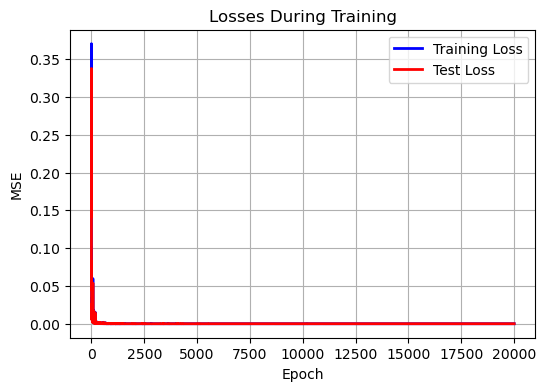

In [ ]:
nn_square_simple = NeuralNetwork(task="regression", layers=[1, 20, 20, 1], activation='relu',weights_initialize="He" )
nn_square_simple.train(X_train_square_simple_normalized, Y_train_square_simple_normalized, 
                       X_test_square_simple_normalized, Y_test_square_simple_normalized, 
                       epochs=20000, batch_size=32, learning_rate=0.1, 
                       verbose=True, verbose_interval=1000)

In [48]:
Y_pred_denorm=normalizer_square_simple.denormalize_Y(nn_square_simple.predict(X_test_square_simple_normalized))
mse = np.mean((Y_pred_denorm - Y_test_square_simple) ** 2)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.637757070364982


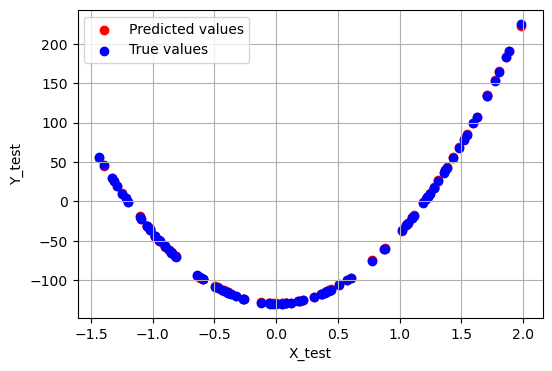

In [49]:
plot_fitted_vs_actual(X_test_square_simple, Y_test_square_simple, Y_pred_denorm, "test")

#### Steps small dataset

Text(0, 0.5, 'Y_train')

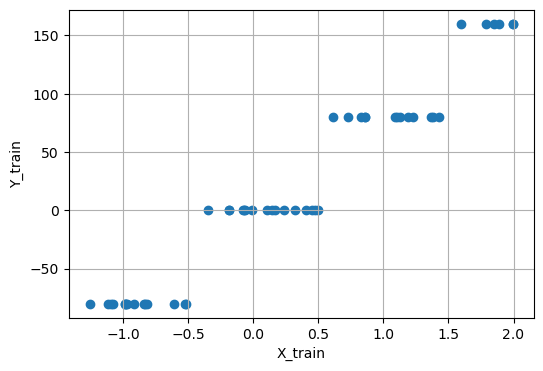

In [68]:
steps_small_training_path='data//steps-small-training.csv'
steps_small_test_path='data/steps-small-test.csv'

X_train_steps_small, Y_train_steps_small, X_test_steps_small, Y_test_steps_small=load_data(steps_small_training_path, steps_small_test_path)

plt.figure(figsize=(6, 4))
plt.grid(True)
plt.scatter(X_train_steps_small, Y_train_steps_small)
plt.xlabel('X_train')
plt.ylabel('Y_train')

In [ ]:
nn_steps_small = NeuralNetwork(task="regression", layers=[1, 20,20, 20, 1], activation='tanh', weights_initialize='Xavier')
nn_steps_small.train(X_train_steps_small, Y_train_steps_small, X_test_steps_small, Y_test_steps_small, 
                     batch_size=32, epochs=1000,learning_rate=0.01, 
                     verbose=True, verbose_interval=100)


'nn_steps_small = NeuralNetwork(task="regression", layers=[1, 20,20, 20, 1], activation=\'tanh\', weights_initialize=\'Xavier\')\nnn_steps_small.train(X_train_steps_small, Y_train_steps_small, X_test_steps_small, Y_test_steps_small, \n                     batch_size=32, epochs=1000,learning_rate=0.01, \n                     verbose=True, verbose_interval=100)\n'

In [300]:
Y_pred = nn_steps_small.predict(X_test_steps_small)
mse_test = np.mean((Y_test_steps_small-Y_pred)**2)
print(f"MSE on the test set (on non-normalized data): {mse_test}")

MSE on the test set (on non-normalized data): 0.31992185739710693


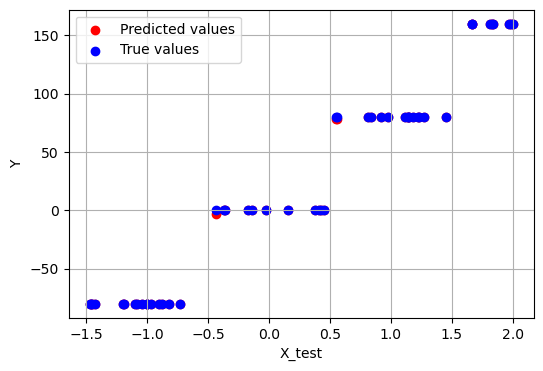

In [301]:
plot_fitted_vs_actual(X_test_steps_small, Y_test_steps_small, Y_pred, "test")

#### Multimodal large dataset

(10000, 1)


Text(0, 0.5, 'Y_train')

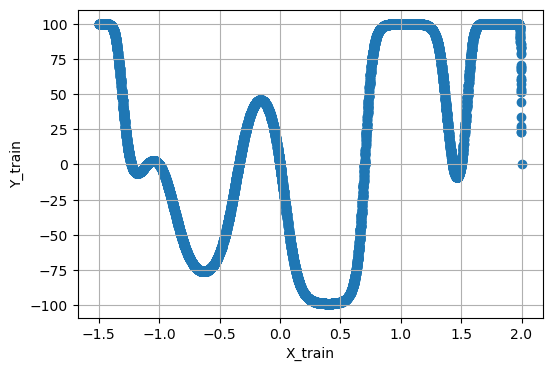

In [2]:
multimodal_large_training_path='data/multimodal-large-training.csv'
multimodal_large_test_path='data/multimodal-large-test.csv'

X_train_multimodal_large, Y_train_multimodal_large, X_test_multimodal_large, Y_test_multimodal_large=load_data(multimodal_large_training_path, multimodal_large_test_path, index_col=None)

print(X_train_multimodal_large.shape)

plt.figure(figsize=(6, 4))
plt.grid(True)
plt.scatter(X_train_multimodal_large, Y_train_multimodal_large)
plt.xlabel('X_train')
plt.ylabel('Y_train')

In [3]:
normalizer_multimodal_large = Normalizer()
X_train_multimodal_large_normalized, Y_train_multimodal_large_normalized = normalizer_multimodal_large.fit_transform(X_train_multimodal_large, Y_train_multimodal_large)
X_test_multimodal_large_normalized, Y_test_multimodal_large_normalized = normalizer_multimodal_large.transform(X_test_multimodal_large, Y_test_multimodal_large)

Epoch 0, Training Loss: 0.069381, Test Loss: 0.070056
Epoch 100, Training Loss: 0.010271, Test Loss: 0.010879
Epoch 200, Training Loss: 0.005080, Test Loss: 0.005147
Epoch 300, Training Loss: 0.004324, Test Loss: 0.004492
Epoch 400, Training Loss: 0.003631, Test Loss: 0.003718


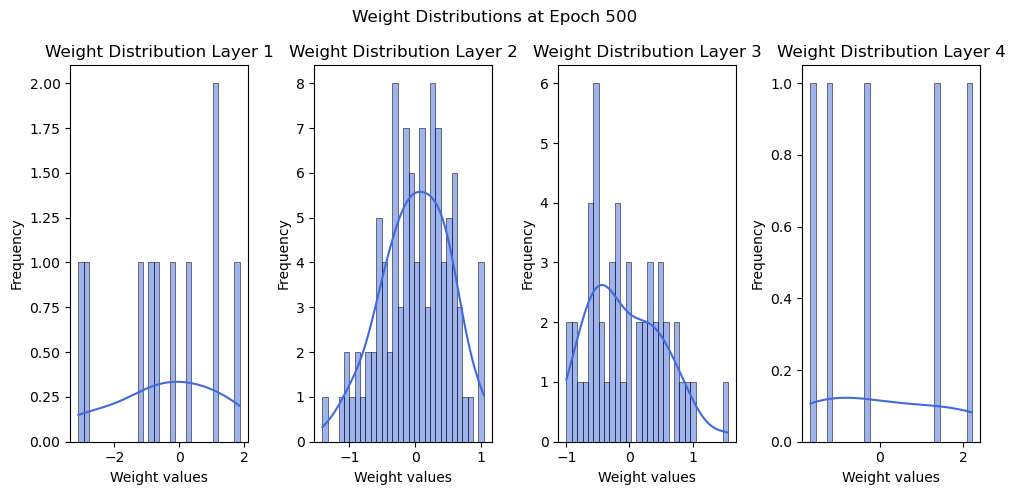

Epoch 500, Training Loss: 0.002717, Test Loss: 0.002753
Epoch 600, Training Loss: 0.002356, Test Loss: 0.002407
Epoch 700, Training Loss: 0.002057, Test Loss: 0.002074
Epoch 800, Training Loss: 0.001721, Test Loss: 0.001740
Epoch 900, Training Loss: 0.001436, Test Loss: 0.001413


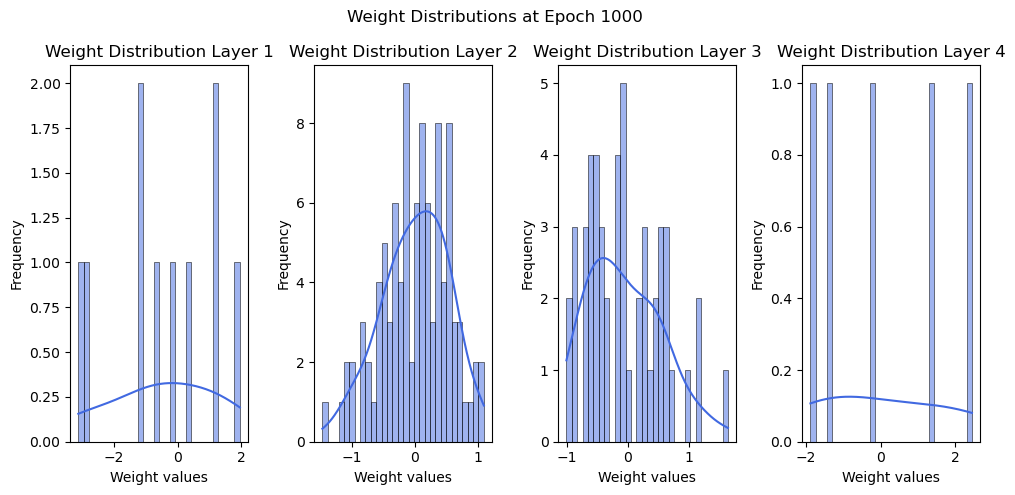

Epoch 1000, Training Loss: 0.001434, Test Loss: 0.001364
Epoch 1100, Training Loss: 0.002337, Test Loss: 0.002246
Epoch 1200, Training Loss: 0.001160, Test Loss: 0.001050
Epoch 1300, Training Loss: 0.001125, Test Loss: 0.001015
Epoch 1400, Training Loss: 0.001061, Test Loss: 0.000956


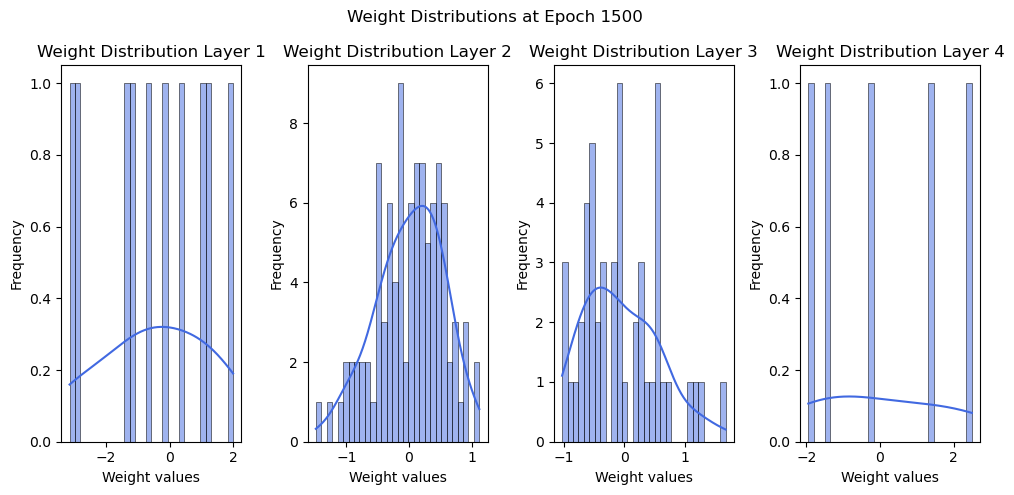

Epoch 1500, Training Loss: 0.001134, Test Loss: 0.001020
Epoch 1600, Training Loss: 0.001951, Test Loss: 0.001816
Epoch 1700, Training Loss: 0.000959, Test Loss: 0.000819
Epoch 1800, Training Loss: 0.000977, Test Loss: 0.000849
Epoch 1900, Training Loss: 0.001371, Test Loss: 0.001249


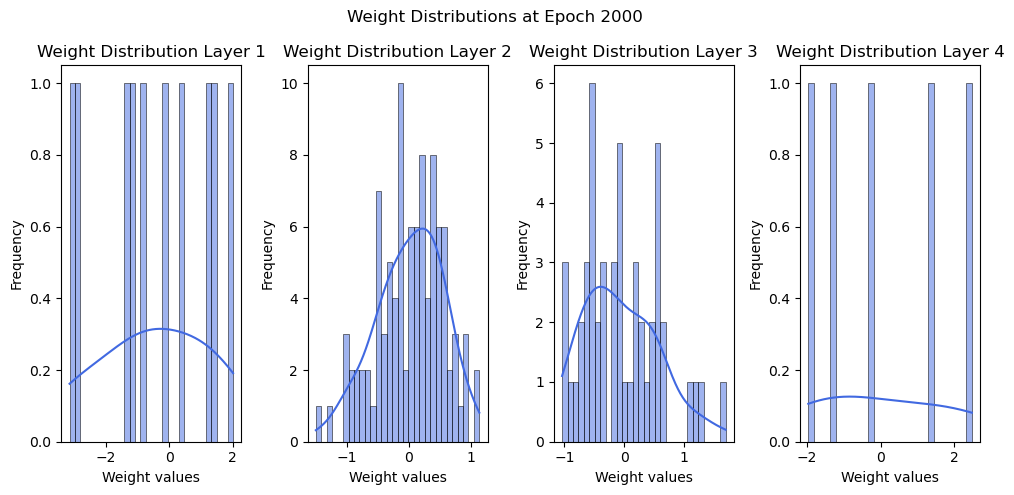

Total training time: 867.53 seconds


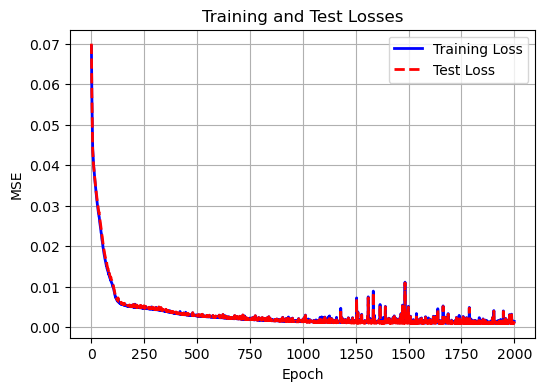

In [ ]:
nn_multimodal_large = NeuralNetwork(task="regression", layers=[1, 10, 10, 5, 1], activation='relu',weights_initialize='He')
nn_multimodal_large.train(X_train_multimodal_large_normalized, Y_train_multimodal_large_normalized, 
                          X_test_multimodal_large_normalized, Y_test_multimodal_large_normalized, 
                          batch_size=32, epochs=2000, learning_rate=0.01, 
                           verbose=True, verbose_interval=100, weights_visualization_interval=500)

The network is learning, but we want to achieve MSE < 40, so we continue training the model for another 1000 epochs.

Epoch 0, Training Loss: 0.001058, Test Loss: 0.000928
Epoch 100, Training Loss: 0.001291, Test Loss: 0.001143
Epoch 200, Training Loss: 0.001017, Test Loss: 0.000881
Epoch 300, Training Loss: 0.001264, Test Loss: 0.001137
Epoch 400, Training Loss: 0.001108, Test Loss: 0.000975
Epoch 500, Training Loss: 0.001061, Test Loss: 0.000923
Epoch 600, Training Loss: 0.001140, Test Loss: 0.001000
Epoch 700, Training Loss: 0.001287, Test Loss: 0.001151
Epoch 800, Training Loss: 0.000920, Test Loss: 0.000778
Epoch 900, Training Loss: 0.001095, Test Loss: 0.000943
Total training time: 378.89 seconds


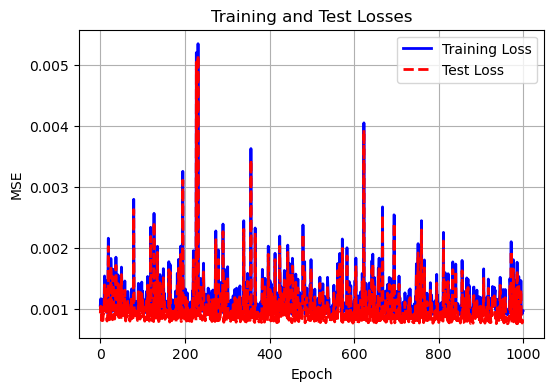

In [419]:
nn_multimodal_large.train(X_train_multimodal_large_normalized, Y_train_multimodal_large_normalized, 
                          X_test_multimodal_large_normalized, Y_test_multimodal_large_normalized, 
                          batch_size=32, epochs=1000, show_training=False)

In [422]:
Y_pred_denorm=normalizer_multimodal_large.denormalize_Y(nn_multimodal_large.predict(X_test_multimodal_large_normalized))
mse_test = np.mean((Y_pred_denorm - Y_test_multimodal_large) ** 2)
print(f"MSE on the test set (on non-normalized data): {mse_test}")

MSE on the test set (on non-normalized data): 33.12549349251915


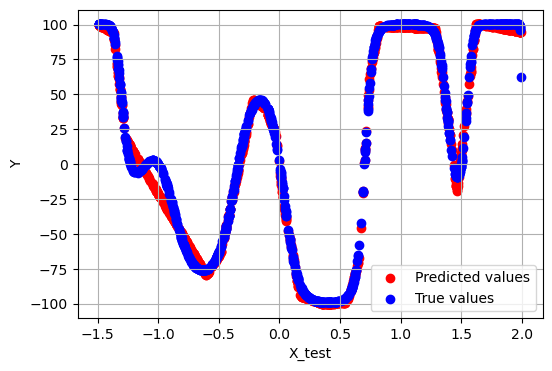

In [423]:
plot_fitted_vs_actual(X_test_multimodal_large, Y_test_multimodal_large, Y_pred_denorm, "test")

trying different learning rates

learning rate 0.1

Epoch 0, Training Loss: 0.053091, Test Loss: 0.053099
Epoch 100, Training Loss: 0.004094, Test Loss: 0.004394
Epoch 200, Training Loss: 0.002413, Test Loss: 0.002674
Epoch 300, Training Loss: 0.005520, Test Loss: 0.005535
Epoch 400, Training Loss: 0.001927, Test Loss: 0.001951
Epoch 500, Training Loss: 0.013566, Test Loss: 0.012754
Epoch 600, Training Loss: 0.000959, Test Loss: 0.000937
Epoch 700, Training Loss: 0.000482, Test Loss: 0.000415
Epoch 800, Training Loss: 0.000935, Test Loss: 0.000823
Epoch 900, Training Loss: 0.000512, Test Loss: 0.000413
Epoch 1000, Training Loss: 0.000894, Test Loss: 0.000825
Epoch 1100, Training Loss: 0.000390, Test Loss: 0.000310
Epoch 1200, Training Loss: 0.000441, Test Loss: 0.000338
Epoch 1300, Training Loss: 0.000412, Test Loss: 0.000320
Epoch 1400, Training Loss: 0.000353, Test Loss: 0.000265
Epoch 1500, Training Loss: 0.000405, Test Loss: 0.000275
Epoch 1600, Training Loss: 0.000354, Test Loss: 0.000260
Epoch 1700, Training Loss: 0.000329, Test L

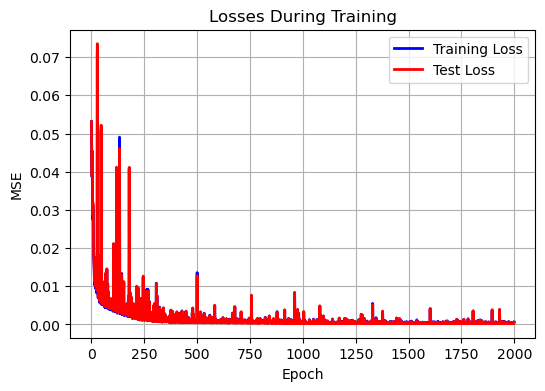

In [18]:
nn_multimodal_large = NeuralNetwork(task="regression", layers=[1, 10, 10, 10, 1], activation='relu',weights_initialize='He')
nn_multimodal_large.train(X_train_multimodal_large_normalized, Y_train_multimodal_large_normalized, 
                          X_test_multimodal_large_normalized, Y_test_multimodal_large_normalized, 
                          batch_size=32, epochs=2000, learning_rate=0.1, 
                           verbose=True, verbose_interval=100, weights_visualization_interval=500)

In [19]:
Y_pred_denorm=normalizer_multimodal_large.denormalize_Y(nn_multimodal_large.predict(X_test_multimodal_large_normalized))
mse_test = np.mean((Y_pred_denorm - Y_test_multimodal_large) ** 2)
print(f"MSE on the test set (on non-normalized data): {mse_test}")

MSE on the test set (on non-normalized data): 21.415615080463613


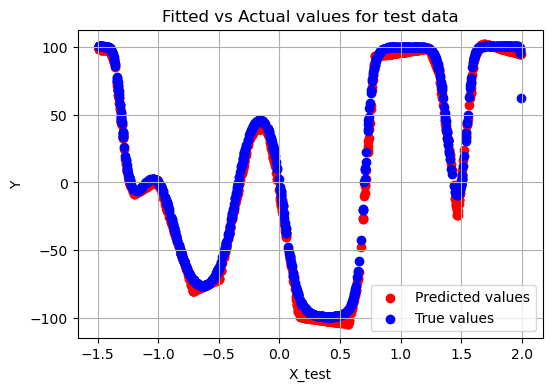

In [20]:
plot_fitted_vs_actual(X_test_multimodal_large, Y_test_multimodal_large, Y_pred_denorm, "test")

learning rate 0.01

Epoch 0, Training Loss: 0.090402, Test Loss: 0.090345
Epoch 100, Training Loss: 0.033457, Test Loss: 0.033445
Epoch 200, Training Loss: 0.021841, Test Loss: 0.022594
Epoch 300, Training Loss: 0.016257, Test Loss: 0.017222
Epoch 400, Training Loss: 0.012826, Test Loss: 0.013492
Epoch 500, Training Loss: 0.008112, Test Loss: 0.008387
Epoch 600, Training Loss: 0.007469, Test Loss: 0.007771
Epoch 700, Training Loss: 0.006392, Test Loss: 0.006502
Epoch 800, Training Loss: 0.005800, Test Loss: 0.005945
Epoch 900, Training Loss: 0.006521, Test Loss: 0.006927
Epoch 1000, Training Loss: 0.010464, Test Loss: 0.010423
Epoch 1100, Training Loss: 0.005192, Test Loss: 0.005234
Epoch 1200, Training Loss: 0.005594, Test Loss: 0.005798
Epoch 1300, Training Loss: 0.005831, Test Loss: 0.005934
Epoch 1400, Training Loss: 0.004507, Test Loss: 0.004494
Epoch 1500, Training Loss: 0.007511, Test Loss: 0.007412
Epoch 1600, Training Loss: 0.003834, Test Loss: 0.003816
Epoch 1700, Training Loss: 0.004497, Test L

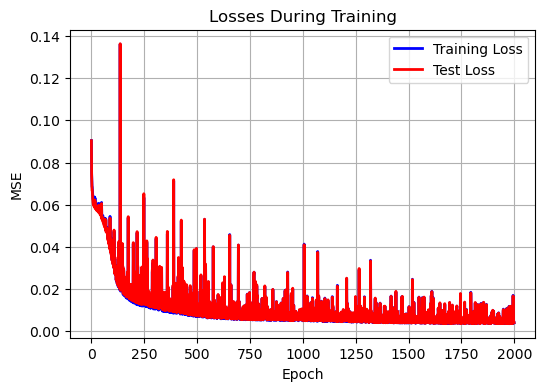

In [21]:
nn_multimodal_large = NeuralNetwork(task="regression", layers=[1, 10, 10, 10, 1], activation='relu',weights_initialize='He')
nn_multimodal_large.train(X_train_multimodal_large_normalized, Y_train_multimodal_large_normalized, 
                          X_test_multimodal_large_normalized, Y_test_multimodal_large_normalized, 
                          batch_size=32, epochs=2000, learning_rate=0.01, 
                           verbose=True, verbose_interval=100, weights_visualization_interval=500)

In [24]:
Y_pred_denorm=normalizer_multimodal_large.denormalize_Y(nn_multimodal_large.predict(X_test_multimodal_large_normalized))
mse_test = np.mean((Y_pred_denorm - Y_test_multimodal_large) ** 2)
print(f"MSE on the test set (on non-normalized data): {mse_test}")

MSE on the test set (on non-normalized data): 160.78935216212548


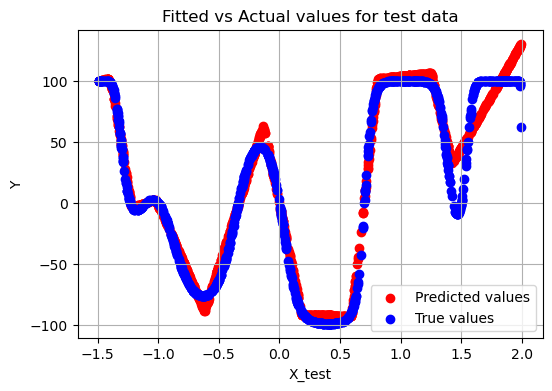

In [25]:
plot_fitted_vs_actual(X_test_multimodal_large, Y_test_multimodal_large, Y_pred_denorm, "test")

learning rate 0.001

Epoch 0, Training Loss: 0.158917, Test Loss: 0.160314
Epoch 100, Training Loss: 0.062703, Test Loss: 0.061739
Epoch 200, Training Loss: 0.058999, Test Loss: 0.058099
Epoch 300, Training Loss: 0.057858, Test Loss: 0.057051
Epoch 400, Training Loss: 0.056653, Test Loss: 0.055891
Epoch 500, Training Loss: 0.055139, Test Loss: 0.054385
Epoch 600, Training Loss: 0.053278, Test Loss: 0.052534
Epoch 700, Training Loss: 0.051037, Test Loss: 0.050307
Epoch 800, Training Loss: 0.047329, Test Loss: 0.046671
Epoch 900, Training Loss: 0.045300, Test Loss: 0.044716
Epoch 1000, Training Loss: 0.043794, Test Loss: 0.043261
Epoch 1100, Training Loss: 0.042643, Test Loss: 0.042116
Epoch 1200, Training Loss: 0.041814, Test Loss: 0.041291
Epoch 1300, Training Loss: 0.041294, Test Loss: 0.040766
Epoch 1400, Training Loss: 0.040837, Test Loss: 0.040311
Epoch 1500, Training Loss: 0.040570, Test Loss: 0.040038
Epoch 1600, Training Loss: 0.040393, Test Loss: 0.039858
Epoch 1700, Training Loss: 0.040312, Test L

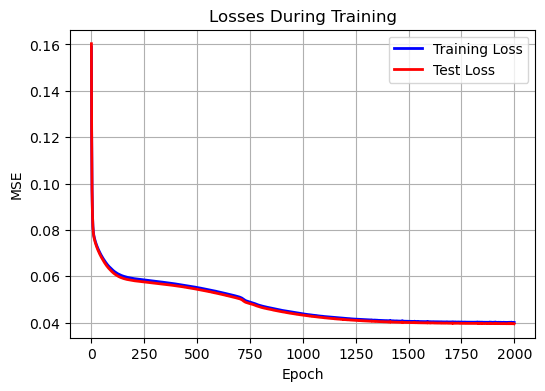

In [12]:
nn_multimodal_large = NeuralNetwork(task="regression", layers=[1, 10, 10, 10, 1], activation='relu',weights_initialize='He')
nn_multimodal_large.train(X_train_multimodal_large_normalized, Y_train_multimodal_large_normalized, 
                          X_test_multimodal_large_normalized, Y_test_multimodal_large_normalized, 
                          batch_size=32, epochs=2000, learning_rate=0.001, 
                           verbose=True, verbose_interval=100, weights_visualization_interval=500)

In [13]:
Y_pred_denorm=normalizer_multimodal_large.denormalize_Y(nn_multimodal_large.predict(X_test_multimodal_large_normalized))
mse_test = np.mean((Y_pred_denorm - Y_test_multimodal_large) ** 2)
print(f"MSE on the test set (on non-normalized data): {mse_test}")

MSE on the test set (on non-normalized data): 1570.4740742227862


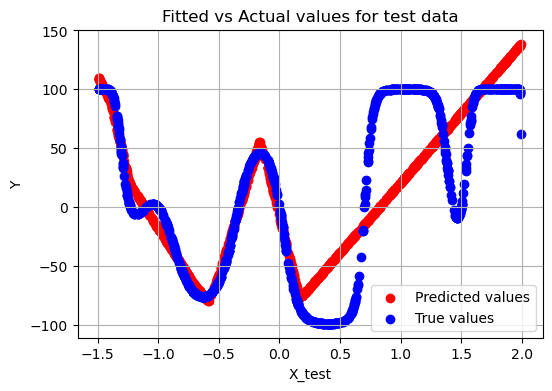

In [14]:
plot_fitted_vs_actual(X_test_multimodal_large, Y_test_multimodal_large, Y_pred_denorm, "test")

#### Time execution full-batch and mini-batch comparison
full-batch and mini-batch for training with 25 epochs

FULL-BATCH GRADIENT DESCENT


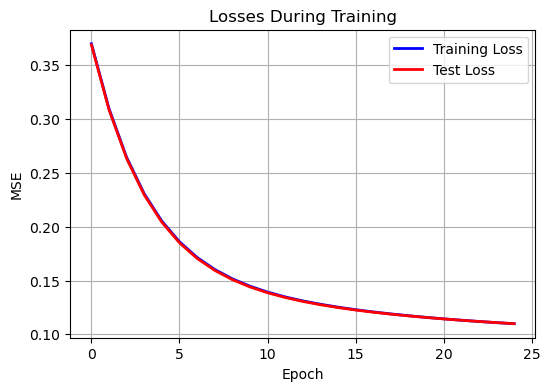

Full-batch training time: 471.00 seconds

MINI-BATCH GRADIENT DESCENT (batch=32)


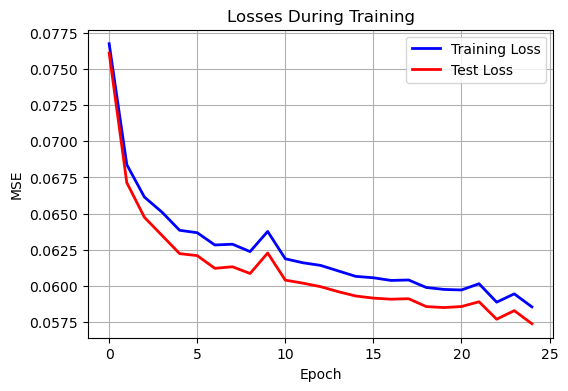

Mini-batch (batch=32) training time: 32.01 seconds

MINI-BATCH GRADIENT DESCENT (batch=64)


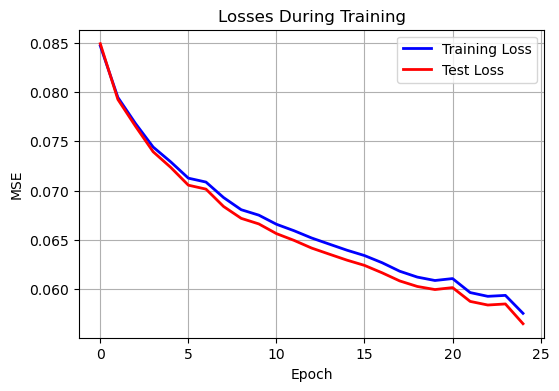

Mini-batch (batch=64) training time: 40.64 seconds


In [22]:
print("FULL-BATCH GRADIENT DESCENT")
start = time.time()
nn_fullbatch = NeuralNetwork(layers=[1, 20, 20, 1], task="regression", activation='relu', weights_initialize='He')
fullbatch_stats = nn_fullbatch.train(
    X_train_multimodal_large_normalized, Y_train_multimodal_large_normalized, 
    X_test_multimodal_large_normalized, Y_test_multimodal_large_normalized, 
    learning_rate=0.01, epochs=25, batch_size=None, verbose=False, return_training_stats=True
)
end = time.time()
print(f"Full-batch training time: {end - start:.2f} seconds")


print("\nMINI-BATCH GRADIENT DESCENT (batch=32)")
start = time.time()
nn_minibatch32 = NeuralNetwork(layers=[1, 20, 20, 1], task="regression", activation='relu', weights_initialize='He')
minibatch32_stats = nn_minibatch32.train(
    X_train_multimodal_large_normalized, Y_train_multimodal_large_normalized, 
    X_test_multimodal_large_normalized, Y_test_multimodal_large_normalized,  
    learning_rate=0.01, epochs=25, batch_size=32, verbose=False, return_training_stats=True
)
end = time.time()
print(f"Mini-batch (batch=32) training time: {end - start:.2f} seconds")


print("\nMINI-BATCH GRADIENT DESCENT (batch=64)")
start = time.time()
nn_minibatch64 = NeuralNetwork(layers=[1, 20, 20, 1], task="regression", activation='relu', weights_initialize='He')
minibatch64_stats = nn_minibatch64.train(
    X_train_multimodal_large_normalized, Y_train_multimodal_large_normalized, 
    X_test_multimodal_large_normalized, Y_test_multimodal_large_normalized,  
    learning_rate=0.01, epochs=25, batch_size=64, verbose=False, return_training_stats=True
)
end = time.time()
print(f"Mini-batch (batch=64) training time: {end - start:.2f} seconds")


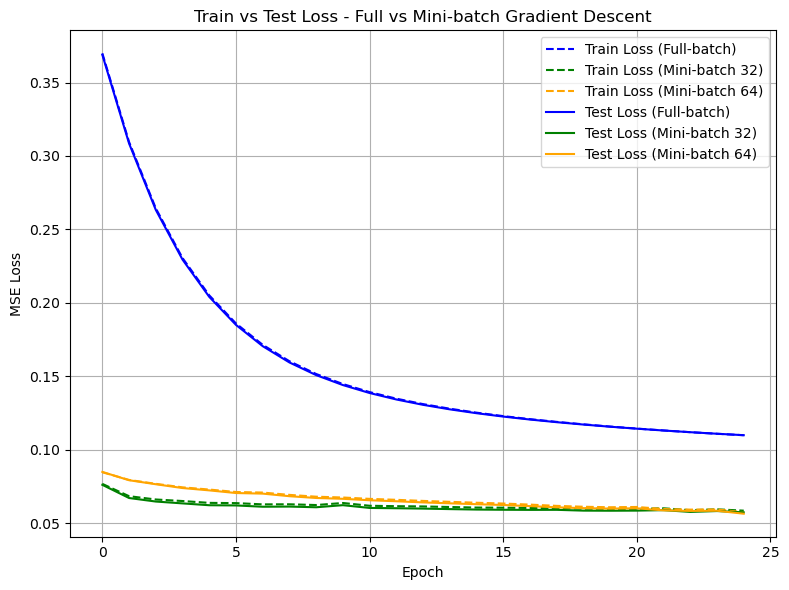

In [24]:
plt.figure(figsize=(8, 6))

plt.plot(fullbatch_stats['train_losses'], label="Train Loss (Full-batch)", linestyle="--", color='blue')
plt.plot(minibatch32_stats['train_losses'], label="Train Loss (Mini-batch 32)", linestyle="--", color='green')
plt.plot(minibatch64_stats['train_losses'], label="Train Loss (Mini-batch 64)", linestyle="--", color='orange')

plt.plot(fullbatch_stats['test_losses'], label="Test Loss (Full-batch)", color='blue')
plt.plot(minibatch32_stats['test_losses'], label="Test Loss (Mini-batch 32)", color='green')
plt.plot(minibatch64_stats['test_losses'], label="Test Loss (Mini-batch 64)", color='orange')

plt.title("Train vs Test Loss - Full vs Mini-batch Gradient Descent")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()